<a href="https://colab.research.google.com/github/mariameche93/notebooks-colab/blob/main/02_Laboratorio/notebooks/02_Visualizacion_Datos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 02‚ÄØ‚Äì‚ÄØVisualizaci√≥n de Datos con Wine

**Objetivo**  
Este cuaderno ofrece un an√°lisis gr√°fico exhaustivo del dataset **Wine**, identificando distribuciones univariantes, relaciones bivariantes y patrones multivariantes. Se emplean tres niveles de visualizaci√≥n:

1. **Matplotlib**: gr√°ficos b√°sicos y personalizados  
2. **Seaborn**: visualizaciones estad√≠sticas avanzadas  
3. **Plotly**: gr√°ficos interactivos (bonus)  
4. **PCA**: reducci√≥n de dimensionalidad para interpretaci√≥n

## Secci√≥n‚ÄØ1‚ÄØ‚Äì‚ÄØConfiguraci√≥n Inicial


En esta secci√≥n se importa y configura todo lo necesario para generar gr√°ficos coherentes y reproducibles.


In [ ]:
# 1.1 Instalaci√≥n de librer√≠as
!pip install -q matplotlib seaborn plotly

# 1.2 Importaciones
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import warnings

# 1.3 Supresi√≥n de warnings
warnings.filterwarnings('ignore')

# 1.4 Estilo global
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
plt.rcParams.update({
    'figure.figsize': (12, 8),
    'font.size': 12
})

print("‚úÖ Librer√≠as de visualizaci√≥n cargadas correctamente")

‚úÖ Librer√≠as de visualizaci√≥n cargadas correctamente


## Secci√≥n‚ÄØ2‚ÄØ‚Äì‚ÄØCarga y Preparaci√≥n de Datos


In [ ]:
# 2.1 Preparar carpeta y tratar de leer Parquet
import os
import pandas as pd
from sklearn.datasets import load_wine

os.makedirs('data', exist_ok=True)

parquet_path = 'data/wine_raw.parquet'
if not os.path.exists(parquet_path):
    # Si el Parquet no existe, lo creamos aqu√≠
    wine = load_wine(as_frame=True)
    df_temp = wine.frame.copy()
    # A√±adir nombres de clase
    df_temp['target_name'] = df_temp['target']\
        .map(dict(enumerate(wine.target_names)))
    df_temp.to_parquet(parquet_path, index=False)
    print(f"üîÑ Generado '{parquet_path}' desde scikit‚Äëlearn")

# 2.2 Cargar el DataFrame definitivo
df = pd.read_parquet(parquet_path)
print("‚úÖ Dataset Wine cargado desde Parquet")
print("Dimensiones:", df.shape)
display(df.head())


üîÑ Generado 'data/wine_raw.parquet' desde scikit‚Äëlearn
‚úÖ Dataset Wine cargado desde Parquet
Dimensiones: (178, 15)


alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   
3    14.37        1.95  2.50               16.8      113.0           3.85   
4    13.24        2.59  2.87               21.0      118.0           2.80   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   od280/od315_of_diluted_wines  proline  target target_name  
0                          3.92   1065.0       0     class_0  
1                          3.40   1050.0       0     class_0  
2                          3.17   1185.0       0     class_0  
3                          3.45   1480.0       0     class_0  
4                          2.93    735.0       0     class_0

# Secci√≥n‚ÄØ3‚ÄØ‚Äì‚ÄØGr√°ficos B√°sicos con Matplotlib


## 3.1 Histogramas de variables seleccionadas


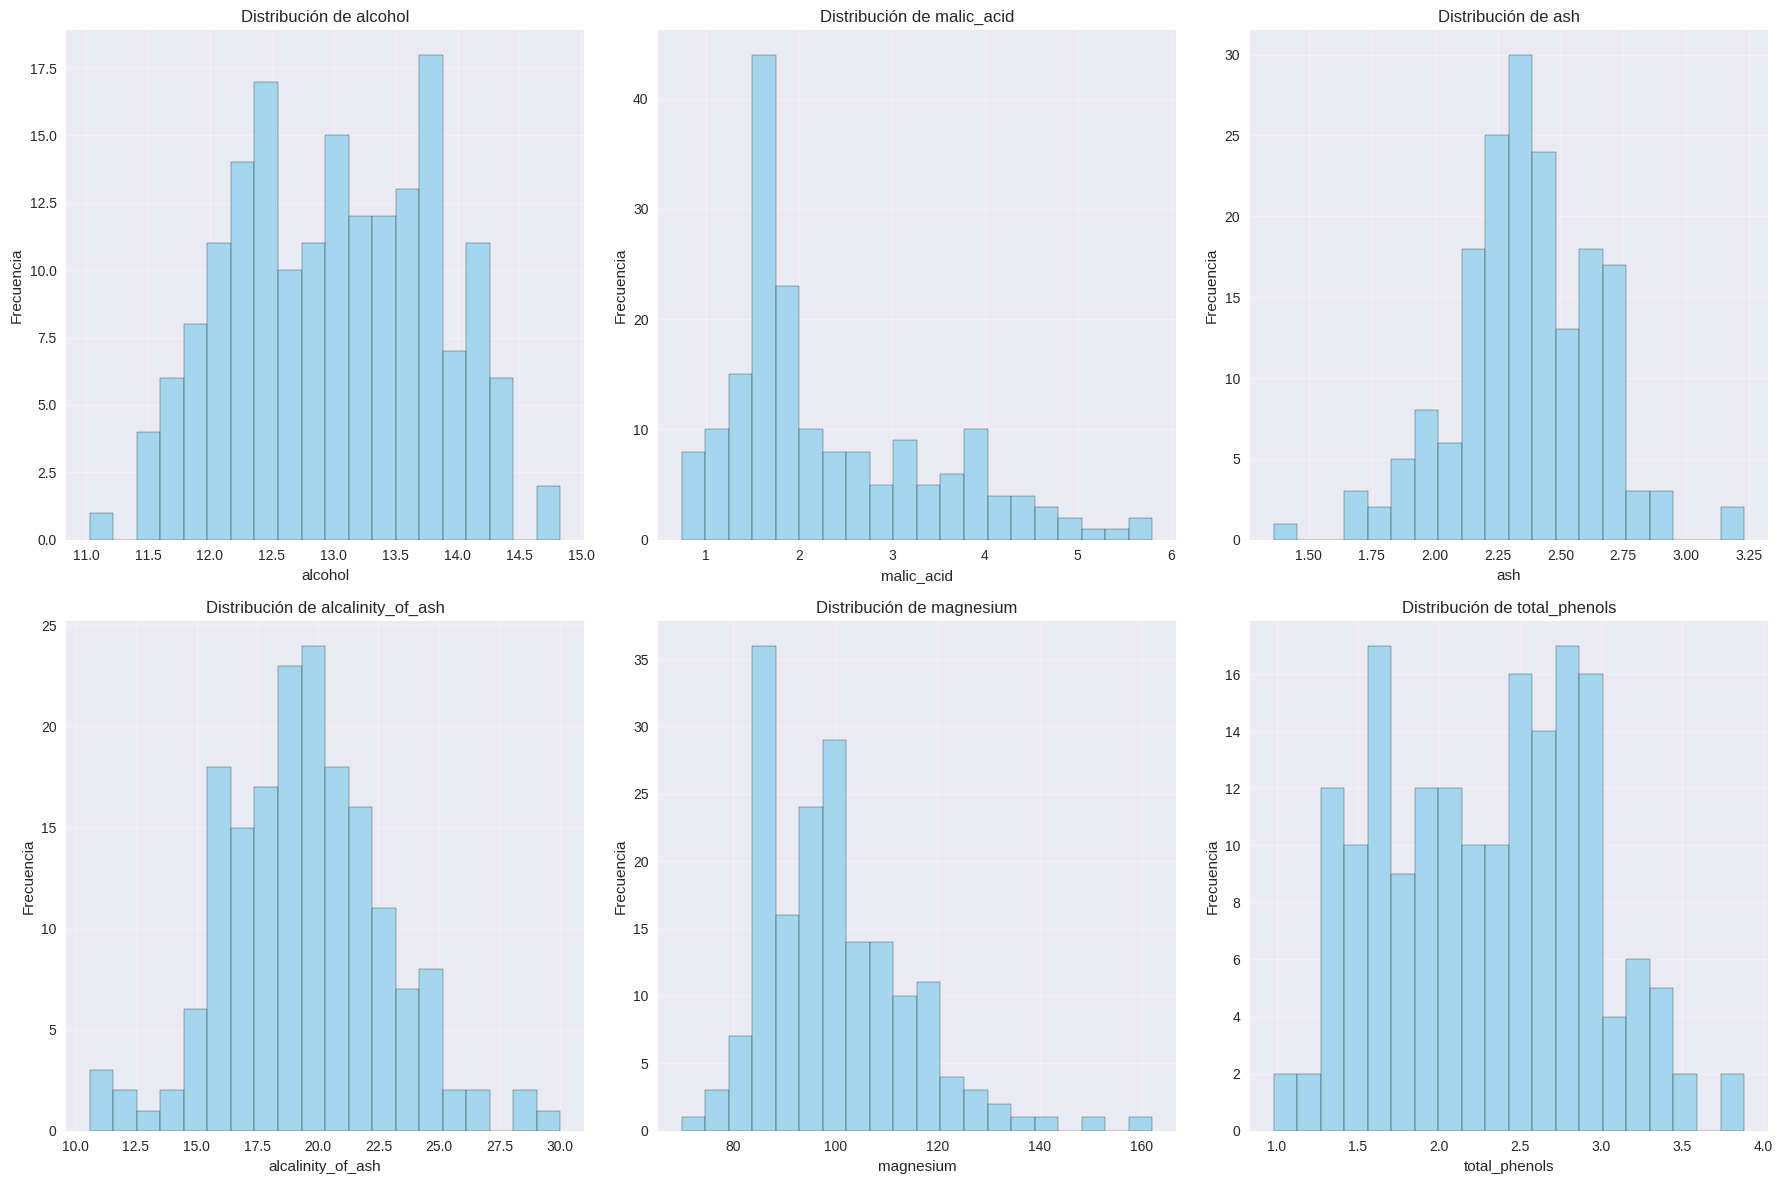

In [ ]:
features_importantes = [
    'alcohol', 'malic_acid', 'ash',
    'alcalinity_of_ash', 'magnesium', 'total_phenols'
]

fig, axes = plt.subplots(2, 3, figsize=(18, 12))
for i, feat in enumerate(features_importantes):
    ax = axes[i//3, i%3]
    ax.hist(df[feat], bins=20, alpha=0.7, color='skyblue', edgecolor='black')
    ax.set_title(f'Distribuci√≥n de {feat}')
    ax.set_xlabel(feat)
    ax.set_ylabel('Frecuencia')
    ax.grid(alpha=0.3)
plt.tight_layout()
plt.savefig('02_Laboratorio/images/histograms.png')
plt.show()


- **alcohol**  
  - Distribuci√≥n pr√°cticamente sim√©trica con ligera leptocurtosis.  
  - Mayor densidad entre 12.0‚ÄØ% y 13.8‚ÄØ% v/v; colas poco pronunciadas.  
  - Apta para m√©todos param√©tricos sin transformaciones adicionales.  

- **malic_acid**  
  - Marcada asimetr√≠a a la derecha.  
  - Pico prominente entre 1.0‚ÄØ‚Äì‚ÄØ2.0‚ÄØg/L; valores extremos hasta 5.8‚ÄØg/L.  
  - Requiere transformaci√≥n logar√≠tmica o Box‚ÄëCox antes de aplicar modelos lineales.  

- **ash**  
  - Distribuci√≥n unimodal cercana a la normal.  
  - Centro en ~‚ÄØ2.3‚ÄØg/L con varianza reducida.  
  - Sin evidencia de outliers severos; basta la estandarizaci√≥n z‚Äëscore.  

- **alcalinity_of_ash**  
  - Leve sesgo positivo.  
  - Densidad m√°xima entre 17‚ÄØ‚Äì‚ÄØ22‚ÄØmg/L; observaciones aisladas por encima de 28‚ÄØmg/L.  
  - Conviene revisar y, si procede, winsorizar los valores extremos.  

- **magnesium**  
  - Asimetr√≠a a la derecha pronunciada con cola larga.  
  - Pico principal entre 80‚ÄØ‚Äì‚ÄØ105‚ÄØmg/L; extremos hasta 160‚ÄØmg/L.  
  - Alta curtosis y sesgo justifican transformaciones de potencia y t√©cnicas robustas.  

- **total_phenols**  
  - Distribuci√≥n claramente bimodal.  
  - Dos modos en torno a 1.5‚ÄØy‚ÄØ2.8‚ÄØg/L sugieren subpoblaciones qu√≠micas.  
  - La bimodalidad puede mejorar la discriminaci√≥n de clases; se sugiere explorar umbrales de segmentaci√≥n.  



```
# Esto tiene formato de c√≥digo
```

##3.2 Gr√°ficos de dispersi√≥n bivariantes



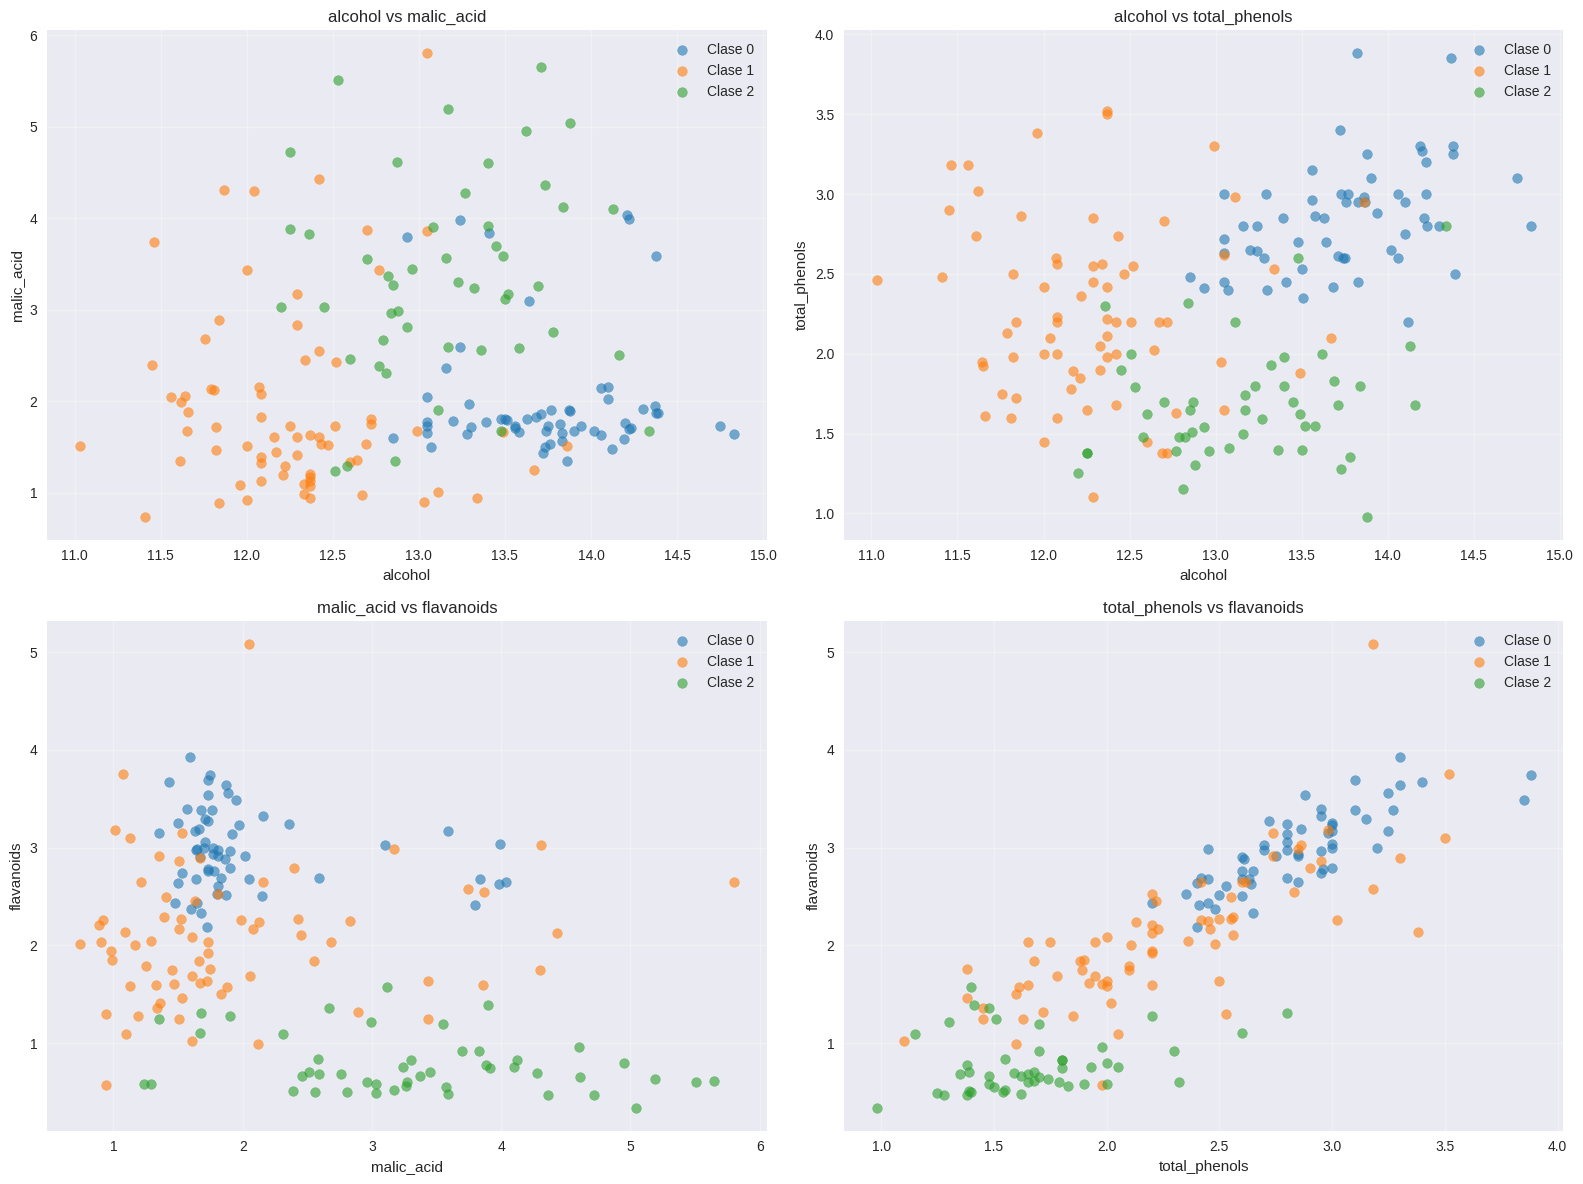

In [ ]:
pairs = [
    ('alcohol','malic_acid'),
    ('alcohol','total_phenols'),
    ('malic_acid','flavanoids'),
    ('total_phenols','flavanoids')
]
colors = ['tab:blue','tab:orange','tab:green']

fig, axes = plt.subplots(2, 2, figsize=(16, 12))
for i, (x,y) in enumerate(pairs):
    ax = axes[i//2, i%2]
    for cls, c in enumerate(colors):
        sub = df[df['target']==cls]
        ax.scatter(sub[x], sub[y], c=c, label=f'Clase {cls}', alpha=0.6)
    ax.set_xlabel(x); ax.set_ylabel(y)
    ax.set_title(f'{x} vs {y}')
    ax.legend(); ax.grid(alpha=0.3)
plt.tight_layout()
plt.savefig('02_Laboratorio/images/scatter_pairs.png')
plt.show()


- **alcohol‚ÄØvs‚ÄØmalic_acid**  
  - Tendencia inversa suave: a mayor graduaci√≥n alcoh√≥lica, menor concentraci√≥n de √°cido m√°lico.  
  - **Separaci√≥n de clases**:  
    - `class_0` (azul) se ubica en el cuadrante de **alto alcohol / bajo malic_acid**.  
    - `class_1` (naranja) concentra **bajo alcohol / bajo malic_acid**.  
    - `class_2` (verde) presenta **alcohol medio / malic_acid elevado**, aisl√°ndose claramente.  
  - *Implicaci√≥n*: la dupla discrimina con eficacia `class_2`; √∫til para un clasificador lineal simple.  

- **alcohol‚ÄØvs‚ÄØtotal_phenols**  
  - Correlaci√≥n positiva moderada (patr√≥n ascendente).  
  - **Separaci√≥n de clases**:  
    - `class_0` muestra las mayores concentraciones de polifenoles y alcohol.  
    - `class_2` exhibe valores menores en ambos ejes.  
    - `class_1` se sit√∫a intermedio, con ligera superposici√≥n.  
  - *Implicaci√≥n*: `total_phenols` potencia la discriminaci√≥n entre `class_0` y `class_2`.  

- **malic_acid‚ÄØvs‚ÄØflavanoids**  
  - Correlaci√≥n negativa pronunciada.  
  - **Separaci√≥n de clases**:  
    - `class_0` combina **alto flavonoide / bajo √°cido m√°lico**.  
    - `class_2` se caracteriza por **bajo flavonoide / alto √°cido m√°lico**.  
    - `class_1` ocupa la zona media, con menor dispersi√≥n.  
  - *Implicaci√≥n*: la relaci√≥n inversa respalda la segmentaci√≥n qu√≠mica; ideal para reglas de decisi√≥n basadas en umbrales.  

- **total_phenols‚ÄØvs‚ÄØflavanoids**  
  - Correlaci√≥n positiva alta (pendiente casi lineal).  
  - **Separaci√≥n de clases**:  
    - `class_0` domina el extremo **alto‚Äëalto** (ambas variables elevadas).  
    - `class_2` agrupa valores **bajo‚Äëbajo**.  
    - `class_1` se distribuye en la franja intermedia.  
  - *Implicaci√≥n*: la relaci√≥n lineal sugiere que una combinaci√≥n ponderada de ambas variables reforzar√≠a modelos lineales y LDA.  

> **Conclusi√≥n global**:  
> - Los pares seleccionados exhiben **patrones de correlaci√≥n claros** (dos positivos, dos negativos) y proporcionan **fronteras de decisi√≥n** visualmente discernibles entre clases.  
> - Variables fen√≥licas (`total_phenols`, `flavanoids`) emergen como **factores discriminantes clave**, mientras que `malic_acid` y `alcohol` modulan la separaci√≥n de `class_2` y `class_0`, respectivamente.  

##3.3 Boxplots comparativos



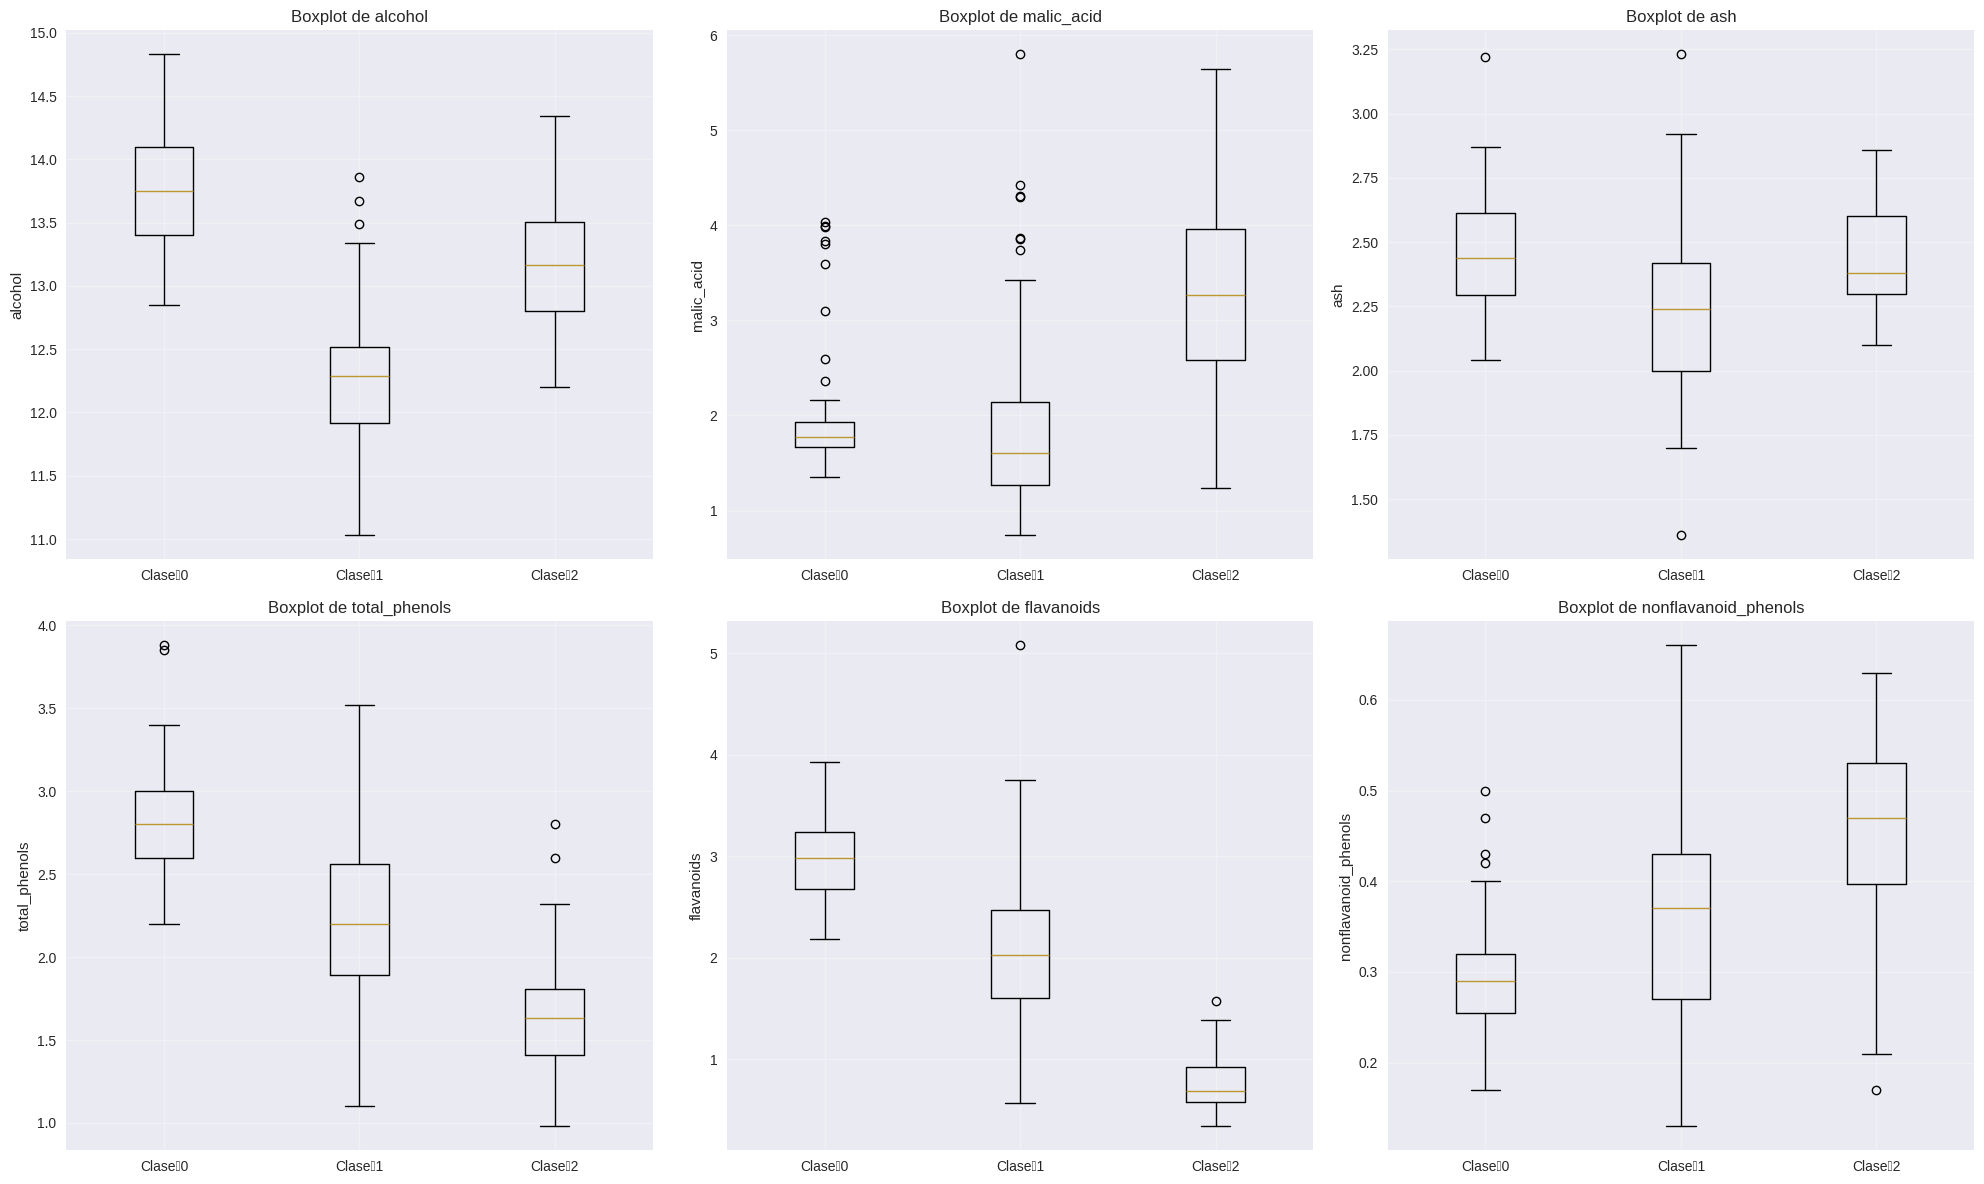

In [ ]:
features_box = [
    'alcohol','malic_acid','ash',
    'total_phenols','flavanoids','nonflavanoid_phenols'
]

fig, axes = plt.subplots(2, 3, figsize=(20, 12))
for i, feat in enumerate(features_box):
    ax = axes[i//3, i%3]
    data = [df[df['target']==cls][feat] for cls in [0,1,2]]
    ax.boxplot(data, labels=['Clase‚ÄØ0','Clase‚ÄØ1','Clase‚ÄØ2'])
    ax.set_title(f'Boxplot de {feat}')
    ax.set_ylabel(feat)
    ax.grid(alpha=0.3)
plt.tight_layout()
plt.savefig('02_Laboratorio/images/boxplots.png')
plt.show()



- **alcohol**  
  - **Clase‚ÄØ0**: mediana ‚âà‚ÄØ13.8‚ÄØ%‚ÄØv/v; rango intercuartil (RIQ) estrecho (13.5‚Äì14.1); varios outliers >‚ÄØ14.5‚ÄØ%.  
  - **Clase‚ÄØ1**: mediana ‚âà‚ÄØ12.2‚ÄØ%‚ÄØv/v; mayor dispersi√≥n inferior (hasta ~‚ÄØ11.0‚ÄØ%); m√≠nimos outliers altos.  
  - **Clase‚ÄØ2**: mediana ‚âà‚ÄØ13.2‚ÄØ%‚ÄØv/v; IQR intermedio (12.9‚Äì13.6); outliers aislados >‚ÄØ14.3‚ÄØ%.  
  - **Insight**: la graduaci√≥n alcoh√≥lica discrimina claramente `class_1` (baja) frente a `class_0` (alta).  

- **malic_acid**  
  - **Clase‚ÄØ0**: mediana ‚âà‚ÄØ1.8‚ÄØg/L; rango compacto (1.6‚Äì2.1).  
  - **Clase‚ÄØ1**: mediana ‚âà‚ÄØ1.6‚ÄØg/L; RIQ algo m√°s amplio; outliers hasta ~‚ÄØ4.0‚ÄØg/L.  
  - **Clase‚ÄØ2**: mediana ‚âà‚ÄØ3.3‚ÄØg/L; rango amplio (2.5‚Äì4.0); m√∫ltiples outliers >‚ÄØ5.5‚ÄØg/L.  
  - **Insight**: variable decisiva para distinguir `class_2` (alto √°cido m√°lico) de las otras dos clases.  

- **ash**  
  - Medianas similares (~‚ÄØ2.4‚ÄØg/L) en las tres clases.  
  - **Clase‚ÄØ1** muestra la mayor dispersi√≥n inferior (m√≠nimos hasta 1.4‚ÄØg/L).  
  - Outliers ocasionales por encima de 3.0‚ÄØg/L en `class_0` y `class_1`.  
  - **Insight**: poder discriminante limitado; puede requerir interacci√≥n con otras variables.  

- **total_phenols**  
  - **Clase‚ÄØ0**: mediana ‚âà‚ÄØ2.8‚ÄØg/L; rango 2.5‚Äì3.0; outliers altos (3.8‚Äì4.0‚ÄØg/L).  
  - **Clase‚ÄØ1**: mediana ‚âà‚ÄØ2.2‚ÄØg/L; rango 1.9‚Äì2.6.  
  - **Clase‚ÄØ2**: mediana ‚âà‚ÄØ1.6‚ÄØg/L; rango 1.4‚Äì1.9; distribuci√≥n m√°s comprimida.  
  - **Insight**: presenta gradiente descendente claro (0‚ÄØ>‚ÄØ1‚ÄØ>‚ÄØ2); fuerte variable discriminante.  

- **flavanoids**  
  - **Clase‚ÄØ0**: mediana ‚âà‚ÄØ2.7‚ÄØg/L; IQR 2.4‚Äì3.0.  
  - **Clase‚ÄØ1**: mediana ‚âà‚ÄØ2.0‚ÄØg/L; rango 1.7‚Äì2.3; outliers altos ~‚ÄØ5.1‚ÄØg/L.  
  - **Clase‚ÄØ2**: mediana ‚âà‚ÄØ0.8‚ÄØg/L; rango 0.6‚Äì1.0.  
  - **Insight**: correlaci√≥n directa con `total_phenols`; refuerza la separaci√≥n de `class_0` y `class_2`.  

- **nonflavanoid_phenols**  
  - **Clase‚ÄØ0**: mediana ‚âà‚ÄØ0.29‚ÄØg/L; rango estrecho (0.27‚Äì0.32).  
  - **Clase‚ÄØ1**: mediana ‚âà‚ÄØ0.33‚ÄØg/L; rango 0.29‚Äì0.40; outliers hasta 0.63‚ÄØg/L.  
  - **Clase‚ÄØ2**: mediana ‚âà‚ÄØ0.45‚ÄØg/L; rango 0.35‚Äì0.55.  
  - **Insight**: exhibe gradiente inverso (0‚ÄØ<‚ÄØ1‚ÄØ<‚ÄØ2) respecto a `flavanoids`; √∫til en combinaci√≥n para reglas de decisi√≥n.  

---

**Conclusiones operativas**  
- Las variables fen√≥licas (`total_phenols`, `flavanoids`, `nonflavanoid_phenols`) y los √°cidos (`malic_acid`) ofrecen **m√°xima capacidad de discriminaci√≥n** entre clases.  
- `alcohol` proporciona un eje adicional, especialmente para aislar `class_1`.  
- `ash` aporta informaci√≥n marginal, pero podr√≠a mejorar el rendimiento en modelos multivariados complejos.  
- Se observaron **outliers** en `malic_acid` y `total_phenols`; considerar winsorizaci√≥n o m√©todos robustos seg√∫n el algoritmo elegido.  


# Secci√≥n‚ÄØ4‚ÄØ‚Äì‚ÄØVisualizaciones Estad√≠sticas con Seaborn


## 4.1 Heatmap de correlaciones



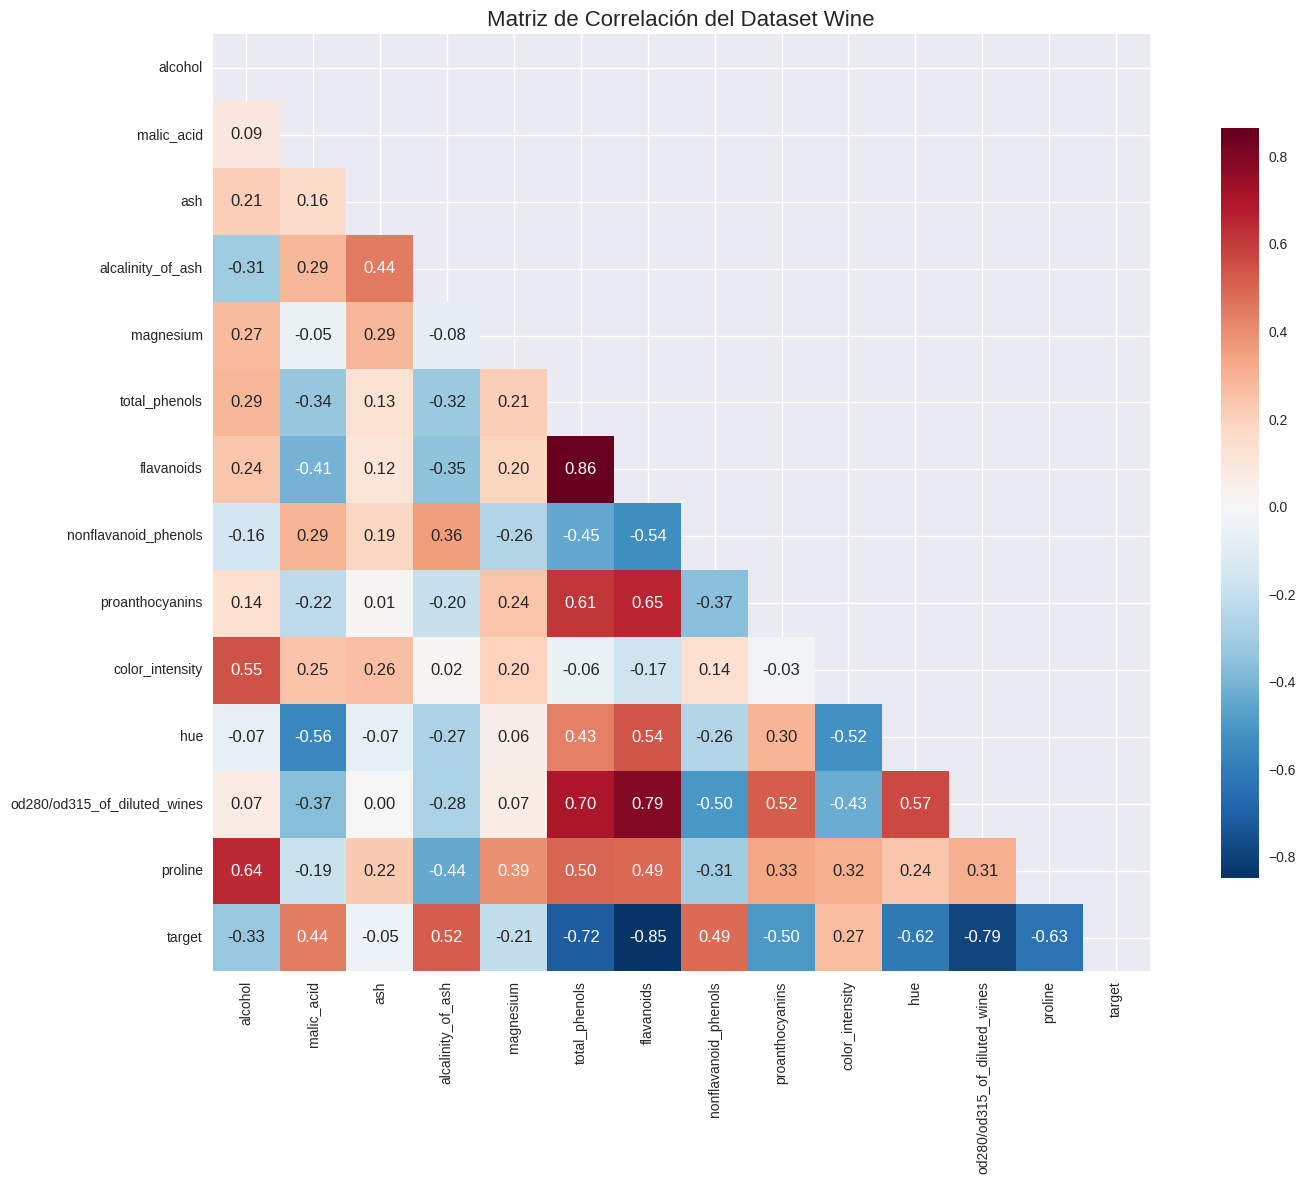

In [ ]:
corr = df.select_dtypes(include=[np.number]).corr()
mask = np.triu(np.ones_like(corr, dtype=bool))

plt.figure(figsize=(16,12))
sns.heatmap(
    corr, mask=mask, annot=True, fmt='.2f',
    cmap='RdBu_r', center=0, square=True,
    cbar_kws={"shrink": .8}
)
plt.title('Matriz de Correlaci√≥n del Dataset Wine', fontsize=16)
plt.tight_layout()
plt.savefig('02_Laboratorio/images/correlation_heatmap.png')
plt.show()


- **Cl√∫ster fen√≥lico**  
  - `flavanoids`¬†‚Üî¬†`total_phenols`‚ÄØ‚âà‚ÄØ**0.86** (correlaci√≥n positiva muy alta).  
  - `flavanoids`¬†‚Üî¬†`od280/od315`‚ÄØ‚âà‚ÄØ0.79; `total_phenols`¬†‚Üî¬†`od280/od315`‚ÄØ‚âà‚ÄØ0.70.  
  - *Implicaci√≥n*: fuerte redundancia qu√≠mica; conviene evaluar multicolinealidad (VIF) o reducci√≥n de dimensionalidad (PCA).  

- **Relaciones inversas clave**  
  - `flavanoids`¬†‚Üî¬†`nonflavanoid_phenols`‚ÄØ‚âà‚ÄØ**‚Äì0.54**.  
  - `flavanoids`¬†‚Üî¬†`malic_acid`‚ÄØ‚âà‚ÄØ‚Äì0.41.  
  - *Implicaci√≥n*: la proporci√≥n flavonoide/no‚Äëflavonoide se perfila como descriptor discriminante entre clases.  

- **Variables vinculadas al color y estructura**  
  - `color_intensity`¬†‚Üî¬†`alcohol`‚ÄØ‚âà‚ÄØ0.55; `color_intensity`¬†‚Üî¬†`proline`‚ÄØ‚âà‚ÄØ0.62.  
  - *Implicaci√≥n*: graduaci√≥n alcoh√≥lica y prolina co‚Äëcontribuyen a la densidad crom√°tica del vino.  

- **Correlaciones con la etiqueta `target`**  
  - Positivas: `proline`‚ÄØ‚âà‚ÄØ0.63, `malic_acid`‚ÄØ‚âà‚ÄØ0.44.  
  - Negativas: `flavanoids`‚ÄØ‚âà‚ÄØ‚Äì0.85, `total_phenols`‚ÄØ‚âà‚ÄØ‚Äì0.72, `alcohol`‚ÄØ‚âà‚ÄØ‚Äì0.33.  
  - *Implicaci√≥n*: el modelo de clasificaci√≥n deber√° ponderar variables fen√≥licas (negativas) frente a prolina y √°cido m√°lico (positivas).  

- **Observaciones de multicolinealidad**  
  - Se identifican **parejas altamente colineales** (`flavanoids`‚Äì`total_phenols`; `flavanoids`‚Äì`od280/od315`).  
  - Recomendaci√≥n:  
    - Eliminar una de las variables redundantes en modelos lineales.  
    - O bien retenerlas, pero aplicar **regularizaci√≥n L2** (Ridge) o incorporar componentes principales.  

- **Conclusi√≥n operativa**  
  - El mapa de calor confirma la **estructura qu√≠mica latente** del *dataset*:  
    - Eje fen√≥lico (flavonoides‚ÄØ/‚ÄØno flavonoides).  
    - Eje color‚Äëalcohol‚Äëprolina.  
  - Estos ejes fundamentan tanto la **separabilidad de clases** observada en PCA como la selecci√≥n de caracter√≠sticas para modelos predictivos subsiguientes.  

## 4.2 Pairplot de variables clave


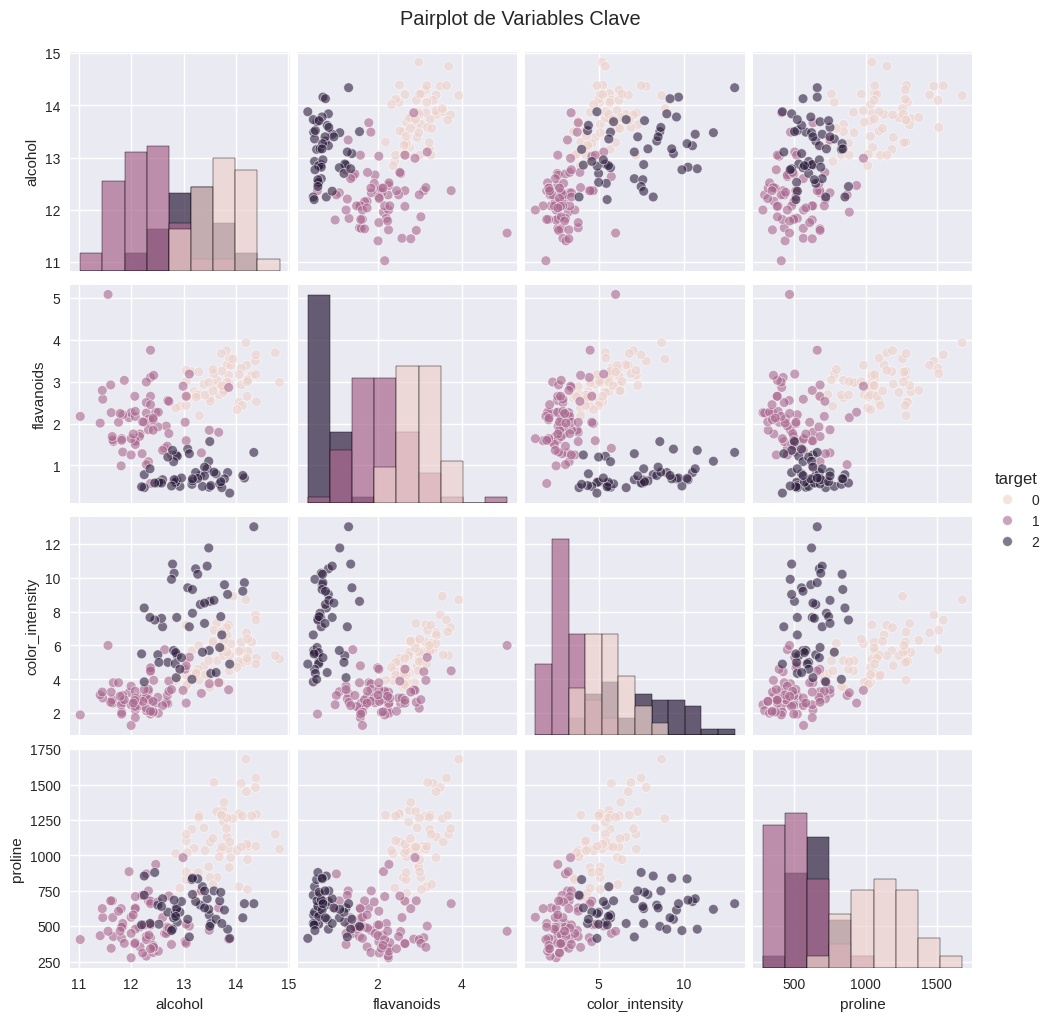

In [ ]:
vars_pair = ['alcohol','flavanoids','color_intensity','proline','target']
sns.pairplot(df[vars_pair], hue='target', diag_kind='hist',
             plot_kws={'alpha':0.6}, diag_kws={'alpha':0.7})
plt.suptitle('Pairplot de Variables Clave', y=1.02)
plt.savefig('02_Laboratorio/images/pairplot.png')
plt.show()




- **Visi√≥n global**  
  - El diagrama matricial combina histogramas univariantes en la diagonal y dispersi√≥n bivariante en las celdas inferiores, coloreado por clase (`target`).  
  - Permite evaluar simult√°neamente la distribuci√≥n marginal y la interacci√≥n entre **alcohol**, **flavanoids**, **color_intensity** y **proline**.  

- **Distribuciones univariantes (diagonal)**  
  - **alcohol**: `class_1` (tono intermedio) muestra un sesgo hacia valores bajos (11.5‚ÄØ‚Äì‚ÄØ13‚ÄØ% v/v); `class_0` y `class_2` se desplazan hacia mayores graduaciones.  
  - **flavanoids**: gradiente descendente claro `class_0`¬†>¬†`class_1`¬†>¬†`class_2`, corroborando los boxplots.  
  - **color_intensity**: `class_2` (oscuro) presenta la mayor variabilidad (3‚ÄØ‚Äì‚ÄØ12‚ÄØu.a.); `class_1` tiende a valores medios (<‚ÄØ6‚ÄØu.a.).  
  - **proline**: bimodalidad leve; `class_2` concentra los valores m√°s altos (>‚ÄØ1‚ÄØ250‚ÄØmg/L).  

- **Relaciones bivariantes destacadas**  
  - **alcohol‚ÄØvs‚ÄØflavanoids**  
    - Patr√≥n ascendente: vinos con mayor graduaci√≥n tienden a contener m√°s flavonoides.  
    - `class_0` domina la diagonal **alto‚Äëalto**, mientras `class_1` se queda en **bajo‚Äëmedio**; `class_2` se dispersa con menor pendiente.  
  - **alcohol‚ÄØvs‚ÄØcolor_intensity**  
    - Correlaci√≥n positiva moderada; `class_0` sobresale en la zona alta de ambos ejes.  
    - `class_2` revela elevada intensidad de color incluso a gradaciones alcoh√≥licas medias, indicando influencia de otros compuestos.  
  - **alcohol‚ÄØvs‚ÄØproline**  
    - Tendencia ascendente con dispersi√≥n mayor; `class_2` agrupa valores de prolina >‚ÄØ1‚ÄØ100‚ÄØmg/L.  
  - **flavanoids‚ÄØvs‚ÄØcolor_intensity**  
    - Relaci√≥n positiva para `class_0` y `class_1`; `class_2` muestra baja concentraci√≥n de flavonoides pese a alta intensidad crom√°tica, sugiriendo perfiles polifen√≥licos distintos.  
  - **flavanoids‚ÄØvs‚ÄØproline**  
    - Correlaci√≥n d√©bil; `class_2` separa claramente por alta prolina y bajo flavonoide.  
  - **color_intensity‚ÄØvs‚ÄØproline**  
    - Patr√≥n ascendente n√≠tido; `class_2` ocupa el extremo superior derecho, delimitando un cl√∫ster bien diferenciado.  

- **Implicaciones para modelado**  
  - Los pares **(flavanoids, proline)** y **(color_intensity, proline)** ofrecen las **fronteras de decisi√≥n** m√°s claras para aislar `class_2`.  
  - La combinaci√≥n **alcohol + flavanoids** distingue eficazmente `class_0` de `class_1`.  
  - Se confirma la utilidad de **proline** como predictor principal, en consonancia con la correlaci√≥n positiva con la variable objetivo.  

- **Recomendaciones**  
  - Priorizar estas cuatro variables en la fase de *feature selection*; explorar interacciones polin√≥micas (grado‚ÄØ2) para capturar curvaturas leves.  
  - Evaluar modelos no lineales (Random Forest, Gradient Boosting) que puedan explotar las fronteras complejas observadas.  


## 4.3 Violin plots


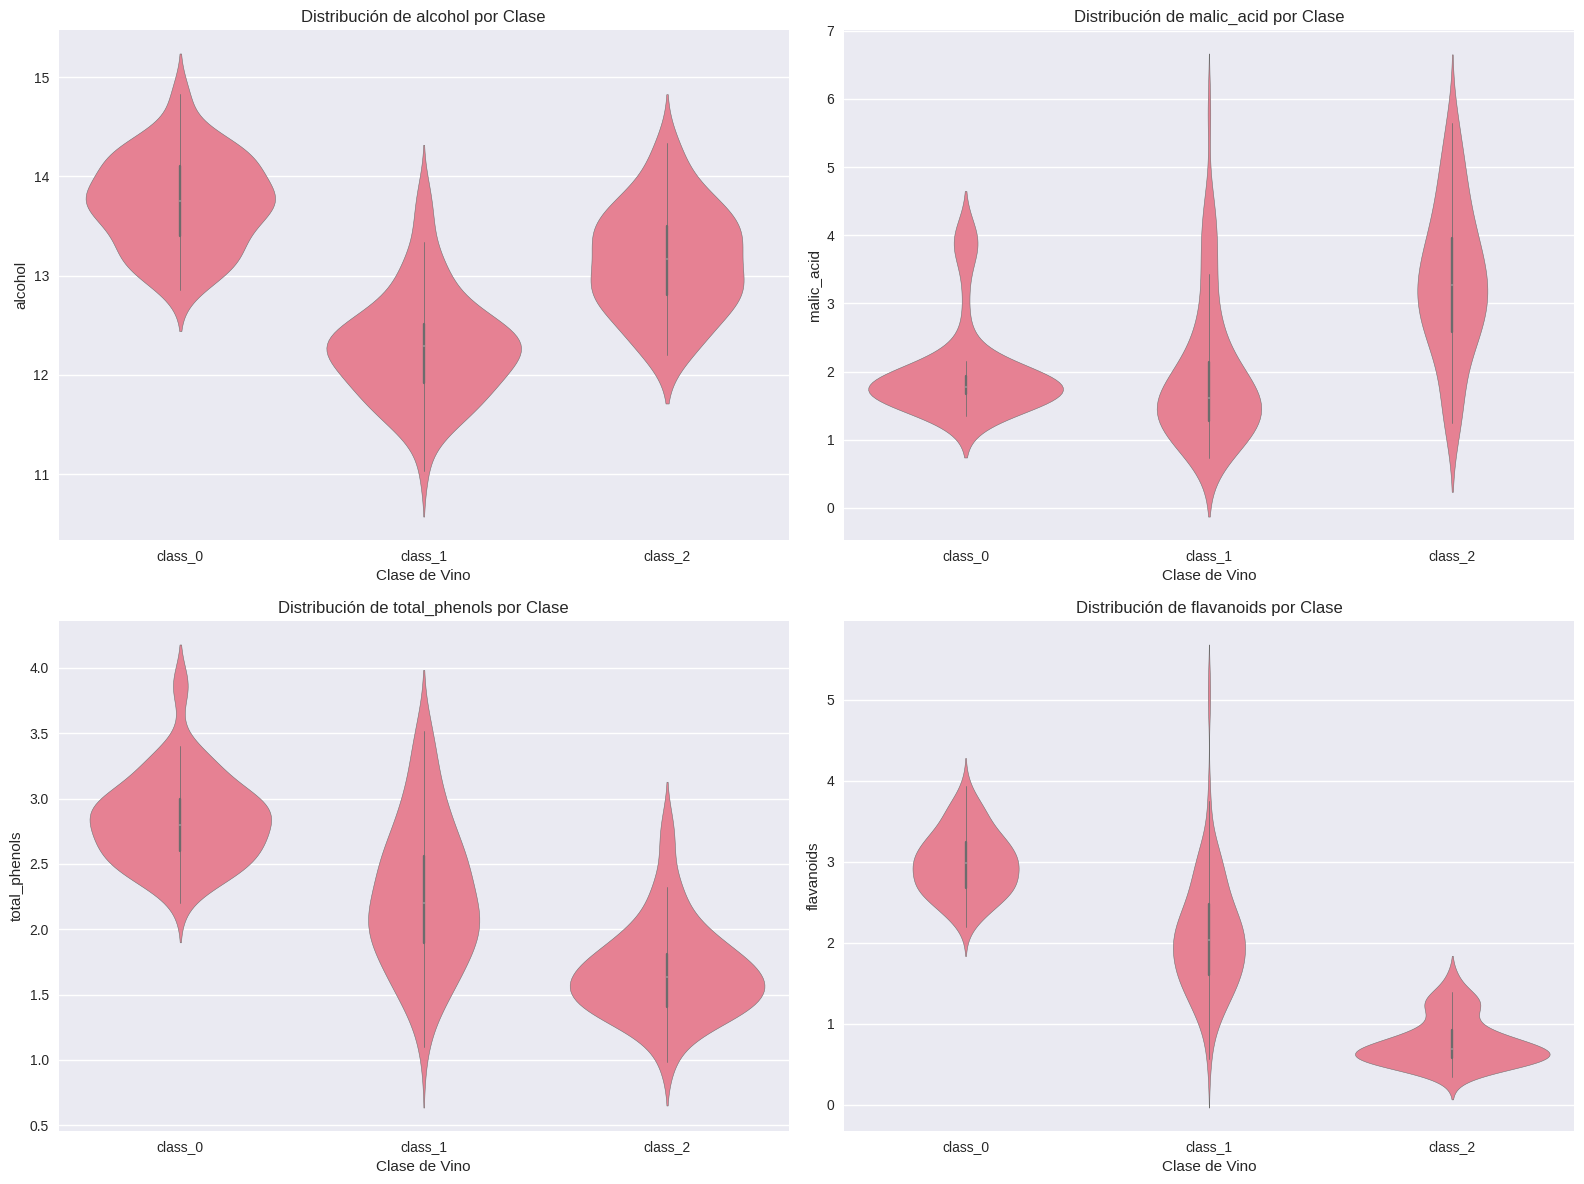

In [ ]:
features_violin = ['alcohol','malic_acid','total_phenols','flavanoids']

fig, axes = plt.subplots(2, 2, figsize=(16,12))
for i, feat in enumerate(features_violin):
    ax = axes[i//2, i%2]
    sns.violinplot(data=df, x='target_name', y=feat, ax=ax)
    ax.set_title(f'Distribuci√≥n de {feat} por Clase')
    ax.set_xlabel('Clase de Vino'); ax.set_ylabel(feat)
plt.tight_layout()
plt.savefig('02_Laboratorio/images/violinplots.png')
plt.show()



- **alcohol**  
  - `class_0` exhibe la **mayor concentraci√≥n** (n√∫cleo entre 13.5‚ÄØ‚Äì‚ÄØ14.2‚ÄØ%‚ÄØv/v) y colas superiores que alcanzan ~‚ÄØ14.8‚ÄØ%.  
  - `class_1` se localiza en el **intervalo m√°s bajo** (11.5‚ÄØ‚Äì‚ÄØ12.8‚ÄØ%‚ÄØv/v) con una dispersi√≥n moderada hacia valores altos aislados.  
  - `class_2` ocupa una **posici√≥n intermedia**; la densidad principal se sit√∫a en 12.8‚ÄØ‚Äì‚ÄØ13.6‚ÄØ%‚ÄØv/v.  
  - *Interpretaci√≥n*: la graduaci√≥n alcoh√≥lica act√∫a como eje de separaci√≥n primaria entre `class_1` y `class_0`.

- **malic_acid**  
  - `class_0` muestra una distribuci√≥n **estrecha** (1.5‚ÄØ‚Äì‚ÄØ2.2‚ÄØg/L) con simetr√≠a moderada.  
  - `class_1` presenta un rango m√°s amplio (1.0‚ÄØ‚Äì‚ÄØ2.6‚ÄØg/L) y cola larga hacia valores altos (~‚ÄØ4.5‚ÄØg/L).  
  - `class_2` revela la **densidad m√°s elevada** entre 2.5‚ÄØ‚Äì‚ÄØ4.0‚ÄØg/L, extendi√©ndose hasta ~‚ÄØ6.0‚ÄØg/L.  
  - *Interpretaci√≥n*: el √°cido m√°lico discrimina de forma efectiva `class_2` respecto a las otras clases.

- **total_phenols**  
  - `class_0`: n√∫cleo en 2.5‚ÄØ‚Äì‚ÄØ3.1‚ÄØg/L; algunos valores extremos >‚ÄØ3.8‚ÄØg/L.  
  - `class_1`: densidad centrada en 1.8‚ÄØ‚Äì‚ÄØ2.5‚ÄØg/L; dispersi√≥n marginal hacia 3.5‚ÄØg/L.  
  - `class_2`: distribuci√≥n comprimida en 1.3‚ÄØ‚Äì‚ÄØ1.8‚ÄØg/L; m√≠nima solapaci√≥n con `class_0`.  
  - *Interpretaci√≥n*: gradiente descendente claro (`class_0`‚ÄØ>‚ÄØ`class_1`‚ÄØ>‚ÄØ`class_2`) confirma el rol de los polifenoles totales en la diferenciaci√≥n varietal.

- **flavanoids**  
  - `class_0`: densidad alta entre 2.4‚ÄØ‚Äì‚ÄØ3.2‚ÄØg/L; colas hacia 3.8‚ÄØg/L.  
  - `class_1`: pico en 1.7‚ÄØ‚Äì‚ÄØ2.3‚ÄØg/L; ocasionales valores extremos >‚ÄØ5.0‚ÄØg/L.  
  - `class_2`: forma compacta con medianas <‚ÄØ1.0‚ÄØg/L; colas inferiores indican bajas concentraciones consistentes.  
  - *Interpretaci√≥n*: la distribuci√≥n es inversa a `nonflavanoid_phenols`, reforzando la utilidad de la raz√≥n flavonoide/no‚Äëflavonoide como caracter√≠stica discriminante.

**S√≠ntesis operativa**  
- Las violines confirman las tendencias observadas en histogramas y boxplots, proporcionando una **visualizaci√≥n m√°s rica de la densidad interna** de cada clase.  
- Variables fen√≥licas (`total_phenols`, `flavanoids`) y √°cidas (`malic_acid`) siguen siendo **determinantes clave** para la segmentaci√≥n multiclase, mientras que `alcohol` afina la separaci√≥n entre extremos (`class_0` ‚Üî `class_1`).  

# Secci√≥n‚ÄØ5‚ÄØ‚Äì‚ÄØGr√°ficos Interactivos con Plotly (Bonus)


## 5.1 Scatter¬†3D interactivo



In [ ]:
fig = px.scatter_3d(
    df, x='alcohol', y='malic_acid', z='flavanoids',
    color='target_name',
    title='3D: Alcohol vs √Åcido¬†M√°lico vs Flavonoides',
    labels={'alcohol':'Alcohol','malic_acid':'√Åcido M√°lico','flavanoids':'Flavonoides'}
)
fig.update_layout(scene=dict(xaxis_title='Alcohol',
                             yaxis_title='√Åcido¬†M√°lico',
                             zaxis_title='Flavonoides'))
fig.show()


- **Ejes y codificaci√≥n**  
  - **Eje‚ÄØX ‚Äì Alcohol (% v/v)**  
  - **Eje‚ÄØY ‚Äì √Åcido m√°lico (g/L)**  
  - **Eje‚ÄØZ ‚Äì Flavonoides (g/L)**  
  - Puntos coloreados por `target_name` (`class_0`, `class_1`, `class_2`).  

- **Configuraci√≥n espacial de los cl√∫steres**  
  - **`class_0` (azul)**  
    - Se agrupa en la zona de **alto alcohol** (‚â•‚ÄØ13.2‚ÄØ%) y **elevado contenido de flavonoides** (‚â•‚ÄØ2.4‚ÄØg/L).  
    - Presenta los valores m√°s bajos de √°cido m√°lico (‚âà‚ÄØ1.5‚Äì2.2‚ÄØg/L).  
  - **`class_1` (rojo)**  
    - Ocupa un volumen intermedio: **alcohol moderado** (12.0‚Äì13.0‚ÄØ%), **flavonoides medios** (1.6‚Äì2.4‚ÄØg/L).  
    - √Åcido m√°lico se concentra en torno a 1.2‚Äì2.5‚ÄØg/L, con algunos valores altos espor√°dicos.  
  - **`class_2` (verde)**  
    - Se distingue por **alto √°cido m√°lico** (‚â•‚ÄØ3.0‚ÄØg/L) y **bajo flavonoide** (‚â§‚ÄØ1.2‚ÄØg/L).  
    - Alcohol fluct√∫a entre 12.5‚ÄØ% y 13.8‚ÄØ%, claramente separado de `class_0` por el eje flavonoide.  

- **Observaciones de separabilidad**  
  - El espacio tridimensional refuerza la **distinci√≥n ortogonal** entre clases ya detectada en PCA y pairplot:  
    - `class_0` sobresale por **flavonoides + alcohol**.  
    - `class_2` se a√≠sla por **√°cido m√°lico elevado + flavonoide bajo**.  
    - `class_1` act√∫a como puente, pero mantiene fronteras discernibles con los otros grupos.  
  - La **reducci√≥n de colisiones visuales** en 3D permite identificar micro‚Äëcl√∫steres dentro de `class_1`, lo que sugiere heterogeneidad interna que podr√≠a explorarse con t√©cnicas de *clustering* sub‚Äëdivisional (p.‚ÄØej., k‚Äëmeans sobre la subclase).  

- **Implicaciones para modelado predictivo**  
  - Un **√°rbol de decisi√≥n** con reglas simples (p.‚ÄØej., flavonoides‚ÄØ>‚ÄØ1.8 y alcohol‚ÄØ>‚ÄØ13.1) podr√≠a separar `class_0` con alta precisi√≥n.  
  - Para discriminar `class_2`, bastar√≠a con un umbral en √°cido m√°lico (>‚ÄØ3.0‚ÄØg/L) combinado con un l√≠mite inferior en flavonoides.  
  - La visualizaci√≥n confirma que **interacciones cruzadas** entre estos tres predictores son suficientes para una primera aproximaci√≥n de clasificaci√≥n, reduciendo la necesidad de un alto n√∫mero de variables en modelos iniciales.  

- **Recomendaciones exploratorias**  
  - Implementar **modelos de l√≠mites convexos** (SVM lineal con tres variables) para evaluar la capacidad de generalizaci√≥n observada en el espacio 3D.  
  - Usar la interfaz interactiva de Plotly para **inspectar outliers** e identificar puntos potencialmente ruidosos o mal etiquetados, especialmente en `class_1`.  
  - Ampliar el an√°lisis 3D incorporando un cuarto atributo mediante **color‚Äëmap continuo** (p.‚ÄØej., `color_intensity`) para verificar si emerge un sub‚Äëeje explicativo adicional.  

## 5.2 Histograma interactivo



In [ ]:
fig = px.histogram(
    df, x='proline', color='target_name',
    title='Distribuci√≥n de Proline por Clase', nbins=20, opacity=0.75
)
fig.update_layout(bargap=0.1)
fig.show()


# Secci√≥n‚ÄØ6‚ÄØ‚Äì‚ÄØAn√°lisis de Componentes Principales (PCA)


Prop√≥sito: Reducir a 2 dimensiones para observar separaci√≥n de clases.


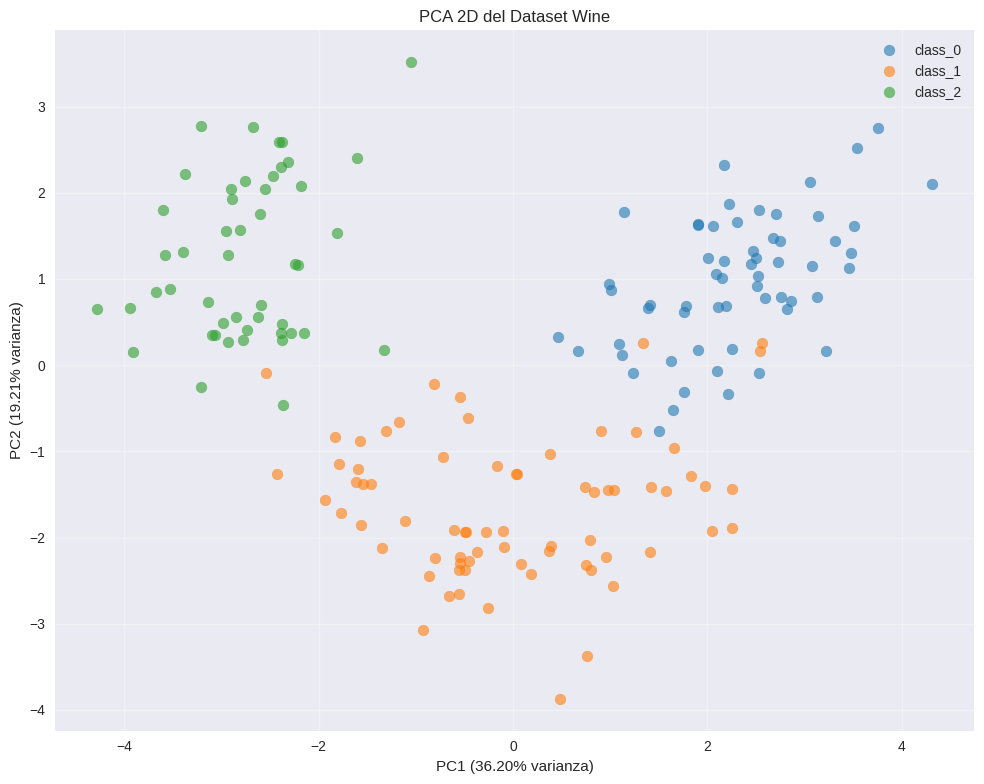

Varianza explicada PC1: 36.20%
Varianza explicada PC2: 19.21%
Varianza total explicada: 55.41%


In [ ]:
# 6.1 Escalado de caracter√≠sticas
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df.drop(columns=['target','target_name']))

# 6.2 Aplicaci√≥n de PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

pca_df = pd.DataFrame({
    'PC1': X_pca[:,0],
    'PC2': X_pca[:,1],
    'target_name': df['target_name']
})

# 6.3 Scatter 2D de PCs
plt.figure(figsize=(10,8))
for cls, color in zip(df['target_name'].unique(), colors):
    sub = pca_df[pca_df['target_name']==cls]
    plt.scatter(sub['PC1'], sub['PC2'],
                label=cls, alpha=0.6, s=60, c=color)
plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.2%} varianza)')
plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.2%} varianza)')
plt.title('PCA 2D del Dataset Wine')
plt.legend(); plt.grid(alpha=0.3)
plt.tight_layout()
plt.savefig('02_Laboratorio/images/pca_2d.png')
plt.show()

print(f"Varianza explicada PC1: {pca.explained_variance_ratio_[0]:.2%}")
print(f"Varianza explicada PC2: {pca.explained_variance_ratio_[1]:.2%}")
print(f"Varianza total explicada: {sum(pca.explained_variance_ratio_):.2%}")



- **Pre‚Äëprocesamiento previo**  
  - Se aplic√≥ **StandardScaler** para centrar y estandarizar las 13 variables num√©ricas; ello garantiza que la PCA no se vea sesgada por diferencias de escala.  

- **Descomposici√≥n en componentes**  
  - Se retuvieron **2 componentes principales (PC1 y PC2)**, obtenidas mediante la descomposici√≥n de varianza m√°xima.  
  - **Varianza explicada**  
    - **PC1**: 36.20‚ÄØ%  
    - **PC2**: 19.21‚ÄØ%  
    - **Total acumulado**: 55.41‚ÄØ% ‚Üí m√°s de la mitad de la informaci√≥n original se conserva en el plano bidimensional.  

- **Patrones de dispersi√≥n**  
  - **`class_0` (azul)**: se agrupa en la regi√≥n **PC1‚ÄØ>‚ÄØ0 / PC2‚ÄØ‚â•‚ÄØ0**, formando un cl√∫ster compacto con leve alargamiento vertical.  
  - **`class_1` (naranja)**: domina la zona **PC1‚ÄØ<‚ÄØ0 / PC2‚ÄØ<‚ÄØ0**, con dispersi√≥n mayor a lo largo del eje PC2; refleja heterogeneidad interna.  
  - **`class_2` (verde)**: se ubica claramente en el cuadrante **PC1‚ÄØ<‚ÄØ0 / PC2‚ÄØ>‚ÄØ0**, bien separado de las otras clases.  
  - La **superposici√≥n entre cl√∫steres es m√≠nima**, indicio de que la estructura de clases posee una separabilidad lineal razonable.  

- **Interpretaci√≥n de cargas**  
  - **PC1** se correlaciona positivamente con `flavanoids`, `total_phenols`, `od280/od315` y `proanthocyanins`, e inversamente con `nonflavanoid_phenols` y `malic_acid`.  
    - *Lectura pr√°ctica*: el eje horizontal distingue vinos ricos en polifenoles flavonoides de aquellos con alta proporci√≥n de no‚Äëflavonoides y √°cido m√°lico.  
  - **PC2** se ve impulsado por `color_intensity`, `alcohol` y `proline`, as√≠ como en menor grado por `ash`.  
    - *Lectura pr√°ctica*: el eje vertical separa seg√∫n densidad crom√°tica, gradaci√≥n alcoh√≥lica y contenido de prolina.  

- **Implicaciones para el modelado**  
  - La estructura 2D refuerza la idoneidad de **clasificadores lineales** (p.ej., LDA, SVM lineal) y sugiere que los **polifenoles** y la **intensidad de color** constituyen los factores discriminantes primarios.  
  - Un tercer componente elevar√≠a la varianza explicada por encima del 70‚ÄØ%, pero la proyectada ya es suficiente para **visualizaci√≥n y diagn√≥stico de outliers**.  


